🐋 Whale Call Classifier - Model Evaluation & Results Analysis
✅ Test data loaded: 300 samples, 27 classes
✅ Baseline model history loaded
✅ Enhanced model history loaded


✅ Baseline model loaded
✅ Enhanced model loaded


📊 MODEL COMPARISON SUMMARY
--------------------------------------------------
       Model        Architecture Parameters Data Aug LR Schedule Best Val Acc Test Acc Test Acc %
Baseline CNN 3-layer CNN + Dense        N/A       No          No        0.351    0.206      20.6%
Enhanced CNN   8-layer CNN + GAP  1,448,443      Yes         Yes        0.602    0.560      56.0%

🚀 Performance Improvement: +35.4 percentage points
   Relative improvement: +171.6%

📈 TRAINING CURVES COMPARISON
--------------------------------------------------


/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/3401110042.py:175: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.tight_layout()
/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/3401110042.py:176: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.savefig('../results/model_comparison_analysis.png', dpi=300, bbox_inches='tight')
/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


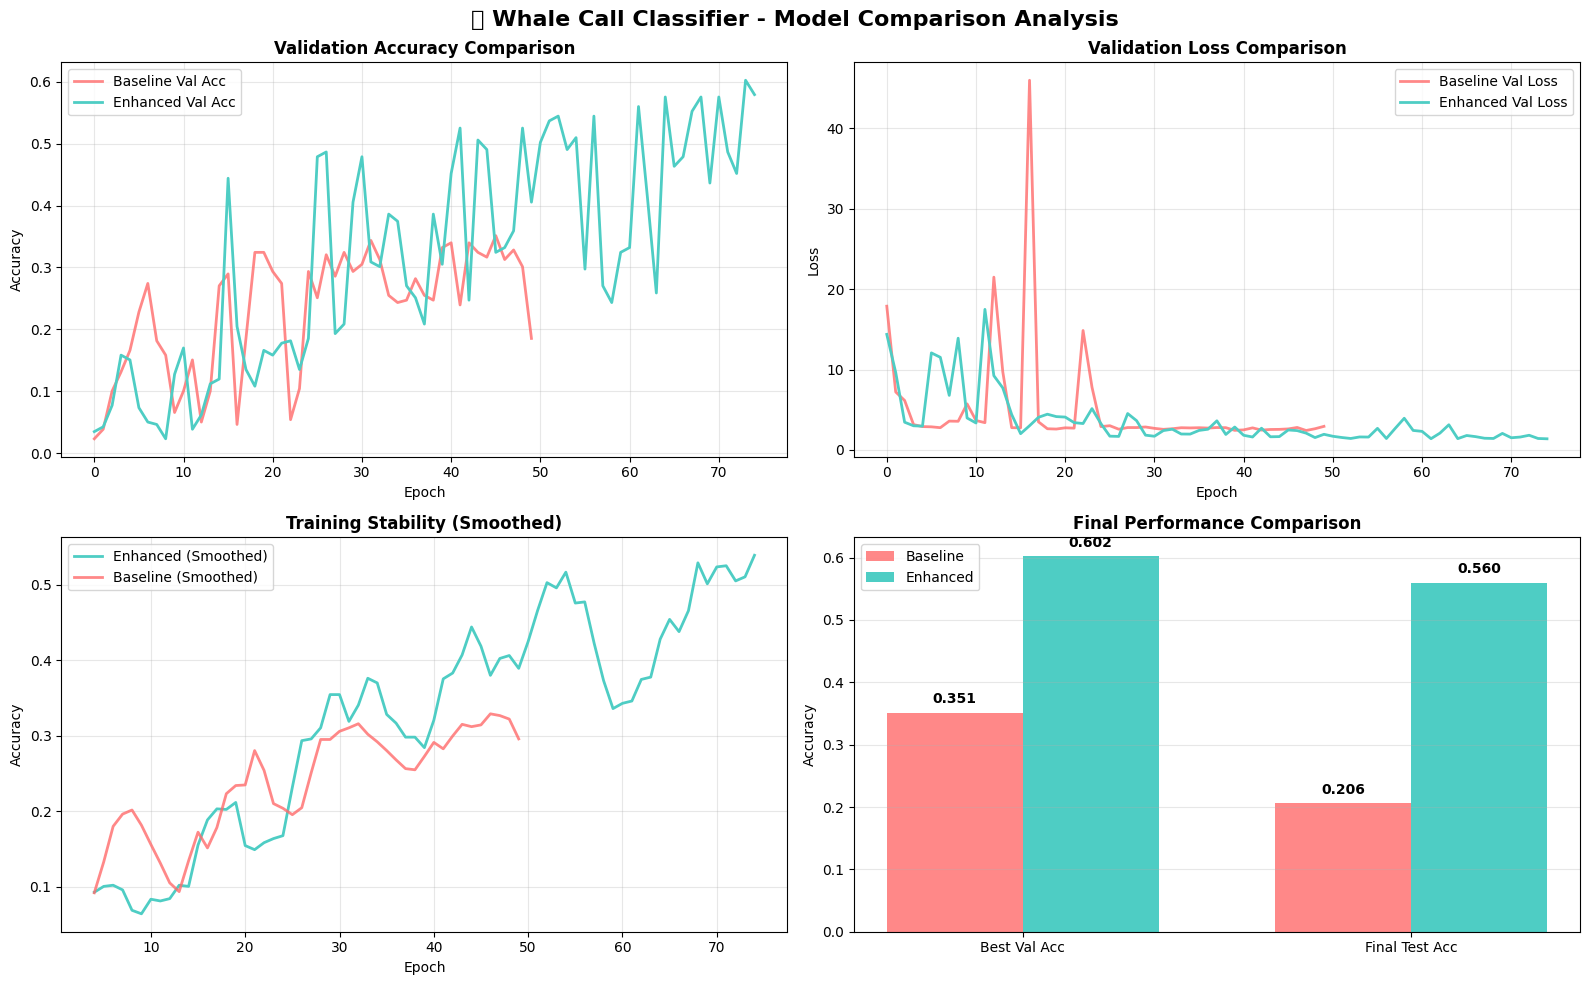


🎯 DETAILED PERFORMANCE ANALYSIS
--------------------------------------------------
🔮 Generating predictions with Enhanced CNN...


/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



📊 Per-Class Performance (sorted by F1-Score):
                         Species  Support  Precision  Recall  F1-Score
              Fin, Finback Whale        6      1.000   1.000     1.000
                  Humpback Whale       12      0.846   0.917     0.880
                 Spinner Dolphin       23      0.842   0.696     0.762
             White-sided Dolphin       11      0.692   0.818     0.750
        Atlantic Spotted Dolphin       12      0.750   0.750     0.750
                       Ross Seal       10      0.778   0.700     0.737
                   Bowhead Whale       12      0.727   0.667     0.696
                     Sperm Whale       13      0.875   0.538     0.667
              False Killer Whale       10      0.500   0.800     0.615
            White-beaked Dolphin       11      0.423   1.000     0.595
                          Walrus        8      0.556   0.625     0.588
            Northern Right Whale       11      0.450   0.818     0.581
           Rough-Toothed Dolph

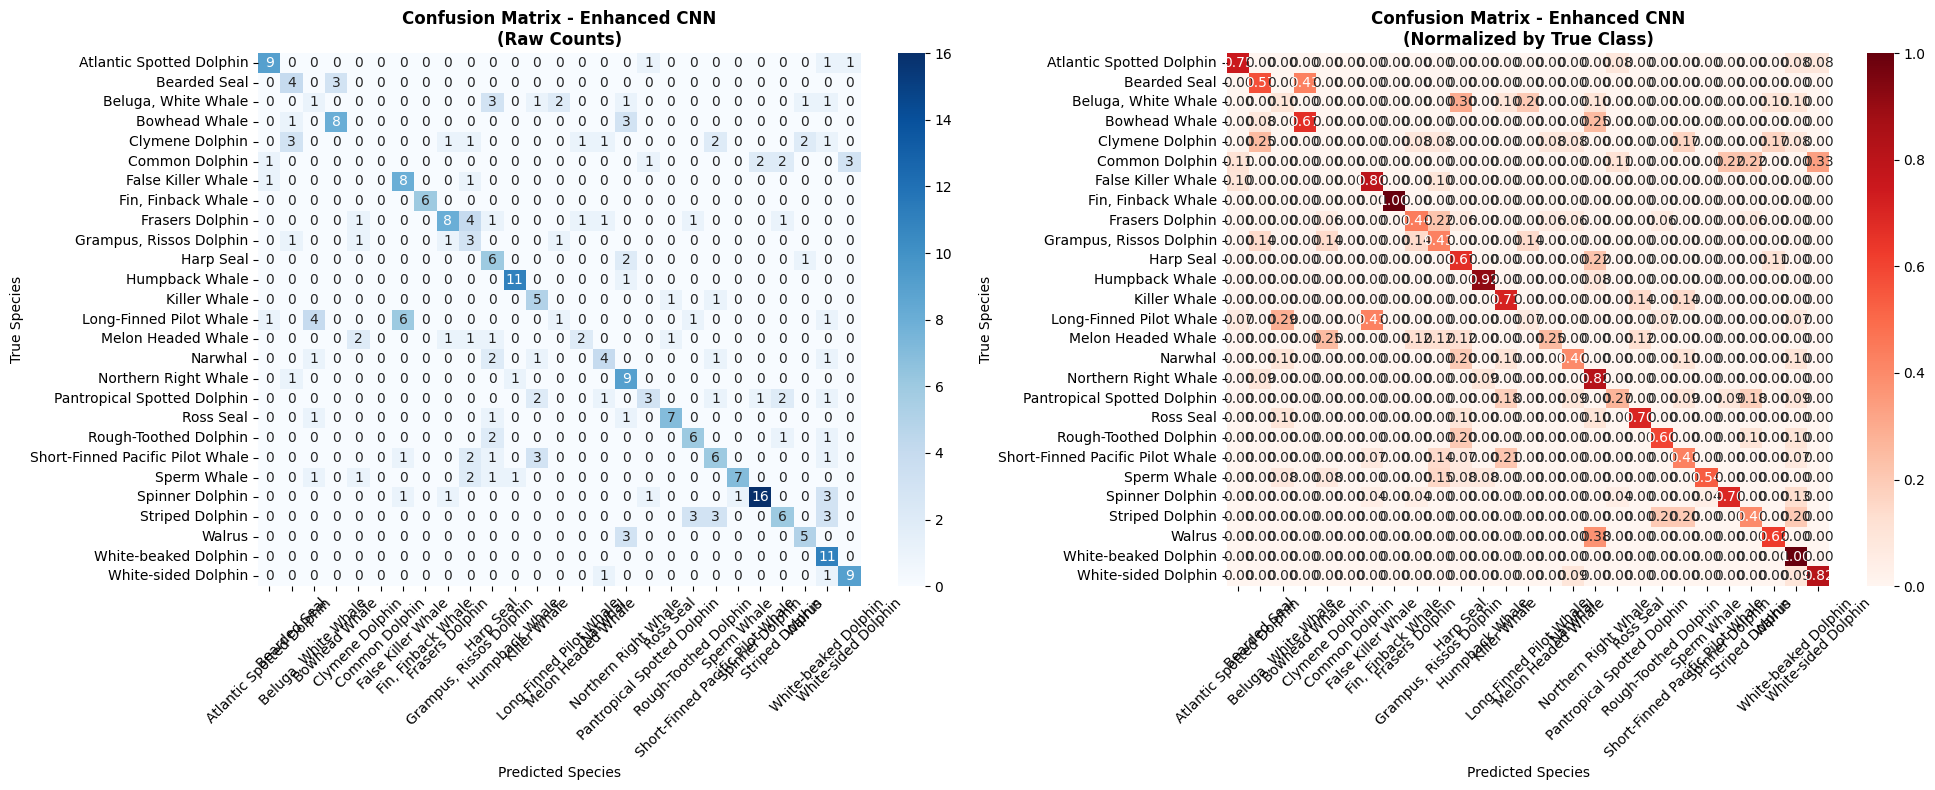


🔍 Most Confused Species Pairs:
----------------------------------------
                    True Species                Predicted Species  Count  Rate
         Long-Finned Pilot Whale               False Killer Whale      6 0.429
                 Frasers Dolphin          Grampus, Rissos Dolphin      4 0.222
         Long-Finned Pilot Whale              Beluga, White Whale      4 0.286
Short-Finned Pacific Pilot Whale                     Killer Whale      3 0.214
                 Spinner Dolphin             White-beaked Dolphin      3 0.130
                  Common Dolphin              White-sided Dolphin      3 0.333
                 Clymene Dolphin                     Bearded Seal      3 0.250
                   Bowhead Whale             Northern Right Whale      3 0.250
                 Striped Dolphin            Rough-Toothed Dolphin      3 0.200
                 Striped Dolphin Short-Finned Pacific Pilot Whale      3 0.200

💾 SAVING EVALUATION RESULTS
-----------------------------

In [2]:
# 🎯 Comprehensive Model Evaluation and Results Analysis
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pandas as pd

print("🐋 Whale Call Classifier - Model Evaluation & Results Analysis")
print("="*70)

# Load test data and models
try:
    X_test = np.load('../data/processed/X_test.npy')
    y_test = np.load('../data/processed/y_test.npy')
    
    with open('../data/processed/species_mapping.pkl', 'rb') as f:
        species_to_int = pickle.load(f)
    
    # Create reverse mapping
    int_to_species = {v: k for k, v in species_to_int.items()}
    species_names = [int_to_species[i].replace('_', ' ') for i in range(len(species_to_int))]
    
    print(f"✅ Test data loaded: {X_test.shape[0]} samples, {len(species_to_int)} classes")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    raise

# Load training history for comparison
baseline_history = None
enhanced_history = None

if os.path.exists('../results/training_history.json'):
    with open('../results/training_history.json', 'r') as f:
        baseline_history = json.load(f)
    print("✅ Baseline model history loaded")

if os.path.exists('../results/enhanced_training_history.json'):
    with open('../results/enhanced_training_history.json', 'r') as f:
        enhanced_history = json.load(f)
    print("✅ Enhanced model history loaded")

# Load models
baseline_model = None
enhanced_model = None

try:
    import tensorflow as tf
    
    if os.path.exists('../models/best_model.keras'):
        baseline_model = tf.keras.models.load_model('../models/best_model.keras')
        print("✅ Baseline model loaded")
    
    if os.path.exists('../models/best_enhanced_model.keras'):
        enhanced_model = tf.keras.models.load_model('../models/best_enhanced_model.keras')
        print("✅ Enhanced model loaded")
        
except Exception as e:
    print(f"⚠️  Error loading models: {e}")

print("\n" + "="*70)

# 📊 Model Comparison Summary
print("\n📊 MODEL COMPARISON SUMMARY")
print("-"*50)

models_data = []
if baseline_history:
    models_data.append({
        'Model': 'Baseline CNN',
        'Architecture': '3-layer CNN + Dense',
        'Parameters': 'N/A',
        'Data Aug': 'No',
        'LR Schedule': 'No',
        'Best Val Acc': f"{baseline_history['best_val_accuracy']:.3f}",
        'Test Acc': f"{baseline_history['final_test_accuracy']:.3f}",
        'Test Acc %': f"{baseline_history['final_test_accuracy']*100:.1f}%"
    })

if enhanced_history:
    models_data.append({
        'Model': 'Enhanced CNN',
        'Architecture': '8-layer CNN + GAP',
        'Parameters': f"{enhanced_history.get('total_parameters', 'N/A'):,}" if enhanced_history.get('total_parameters') else 'N/A',
        'Data Aug': 'Yes',
        'LR Schedule': 'Yes', 
        'Best Val Acc': f"{enhanced_history['best_val_accuracy']:.3f}",
        'Test Acc': f"{enhanced_history['final_test_accuracy']:.3f}",
        'Test Acc %': f"{enhanced_history['final_test_accuracy']*100:.1f}%"
    })

if models_data:
    df_comparison = pd.DataFrame(models_data)
    print(df_comparison.to_string(index=False))
    
    # Performance improvement
    if len(models_data) == 2:
        baseline_acc = baseline_history['final_test_accuracy']
        enhanced_acc = enhanced_history['final_test_accuracy']
        improvement = (enhanced_acc - baseline_acc) * 100
        print(f"\n🚀 Performance Improvement: +{improvement:.1f} percentage points")
        print(f"   Relative improvement: +{improvement/baseline_acc:.1f}%")

# 📈 Training Curves Comparison
print(f"\n📈 TRAINING CURVES COMPARISON")
print("-"*50)

if baseline_history and enhanced_history:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Accuracy comparison
    axes[0,0].plot(baseline_history['val_accuracy'], label='Baseline Val Acc', 
                   color='#FF6B6B', linewidth=2, alpha=0.8)
    axes[0,0].plot(enhanced_history['val_accuracy'], label='Enhanced Val Acc', 
                   color='#4ECDC4', linewidth=2)
    axes[0,0].set_title('Validation Accuracy Comparison', fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Loss comparison
    axes[0,1].plot(baseline_history['val_loss'], label='Baseline Val Loss', 
                   color='#FF6B6B', linewidth=2, alpha=0.8)
    axes[0,1].plot(enhanced_history['val_loss'], label='Enhanced Val Loss', 
                   color='#4ECDC4', linewidth=2)
    axes[0,1].set_title('Validation Loss Comparison', fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Training stability (smoothed)
    if len(enhanced_history['val_accuracy']) >= 5:
        enhanced_smooth = np.convolve(enhanced_history['val_accuracy'], np.ones(5)/5, mode='valid')
        axes[1,0].plot(range(4, len(enhanced_history['val_accuracy'])), enhanced_smooth,
                       color='#4ECDC4', linewidth=2, label='Enhanced (Smoothed)')
    if len(baseline_history['val_accuracy']) >= 5:
        baseline_smooth = np.convolve(baseline_history['val_accuracy'], np.ones(5)/5, mode='valid')
        axes[1,0].plot(range(4, len(baseline_history['val_accuracy'])), baseline_smooth,
                       color='#FF6B6B', linewidth=2, alpha=0.8, label='Baseline (Smoothed)')
    axes[1,0].set_title('Training Stability (Smoothed)', fontweight='bold')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Performance metrics bar chart
    metrics = ['Best Val Acc', 'Final Test Acc']
    baseline_vals = [baseline_history['best_val_accuracy'], baseline_history['final_test_accuracy']]
    enhanced_vals = [enhanced_history['best_val_accuracy'], enhanced_history['final_test_accuracy']]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    axes[1,1].bar(x - width/2, baseline_vals, width, label='Baseline', color='#FF6B6B', alpha=0.8)
    axes[1,1].bar(x + width/2, enhanced_vals, width, label='Enhanced', color='#4ECDC4')
    axes[1,1].set_title('Final Performance Comparison', fontweight='bold')
    axes[1,1].set_ylabel('Accuracy')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(metrics)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (b_val, e_val) in enumerate(zip(baseline_vals, enhanced_vals)):
        axes[1,1].text(i - width/2, b_val + 0.01, f'{b_val:.3f}', ha='center', va='bottom', fontweight='bold')
        axes[1,1].text(i + width/2, e_val + 0.01, f'{e_val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle('🐋 Whale Call Classifier - Model Comparison Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('../results/model_comparison_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 🎯 Detailed Performance Analysis (using best model)
print(f"\n🎯 DETAILED PERFORMANCE ANALYSIS")
print("-"*50)

best_model = enhanced_model if enhanced_model is not None else baseline_model
model_name = "Enhanced CNN" if enhanced_model is not None else "Baseline CNN"

if best_model is not None:
    # Reshape test data for prediction
    X_test_reshaped = np.expand_dims(X_test, axis=-1)
    
    # Get predictions
    print(f"🔮 Generating predictions with {model_name}...")
    y_pred_proba = best_model.predict(X_test_reshaped, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
    
    # Create detailed results DataFrame
    results_df = pd.DataFrame({
        'Species': species_names,
        'Support': support,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    # Sort by F1-score descending
    results_df = results_df.sort_values('F1-Score', ascending=False)
    
    print(f"\n📊 Per-Class Performance (sorted by F1-Score):")
    print("="*80)
    print(results_df.round(3).to_string(index=False))
    
    # Overall metrics
    test_accuracy = np.mean(y_pred == y_test)
    macro_f1 = np.mean(f1)
    weighted_f1 = np.average(f1, weights=support)
    
    print(f"\n📈 Overall Performance Metrics:")
    print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Macro F1-Score: {macro_f1:.4f}")
    print(f"   Weighted F1-Score: {weighted_f1:.4f}")
    
    # Best and worst performing species
    best_species = results_df.iloc[0]['Species']
    worst_species = results_df.iloc[-1]['Species']
    print(f"\n🏆 Best performing: {best_species} (F1: {results_df.iloc[0]['F1-Score']:.3f})")
    print(f"📉 Needs improvement: {worst_species} (F1: {results_df.iloc[-1]['F1-Score']:.3f})")

# 🔥 Confusion Matrix Analysis
print(f"\n🔥 CONFUSION MATRIX ANALYSIS")
print("-"*50)

if best_model is not None:
    cm = confusion_matrix(y_test, y_pred)
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=species_names, yticklabels=species_names, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name}\n(Raw Counts)', fontweight='bold')
    axes[0].set_xlabel('Predicted Species')
    axes[0].set_ylabel('True Species')
    
    # Normalized confusion matrix (by true class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Reds',
                xticklabels=species_names, yticklabels=species_names, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {model_name}\n(Normalized by True Class)', fontweight='bold')
    axes[1].set_xlabel('Predicted Species')
    axes[1].set_ylabel('True Species')
    
    # Rotate x-axis labels
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.savefig('../results/detailed_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analyze most confused species pairs
    print(f"\n🔍 Most Confused Species Pairs:")
    print("-"*40)
    
    # Get off-diagonal elements (misclassifications)
    confusion_pairs = []
    for i in range(len(species_names)):
        for j in range(len(species_names)):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append({
                    'True Species': species_names[i],
                    'Predicted Species': species_names[j],
                    'Count': cm[i, j],
                    'Rate': cm[i, j] / cm[i].sum()
                })
    
    # Sort by confusion count
    confusion_df = pd.DataFrame(confusion_pairs).sort_values('Count', ascending=False)
    print(confusion_df.head(10).round(3).to_string(index=False))

# 💾 Save comprehensive results
print(f"\n💾 SAVING EVALUATION RESULTS")
print("-"*50)

# Create comprehensive evaluation report
evaluation_report = {
    'evaluation_date': pd.Timestamp.now().isoformat(),
    'test_set_size': int(len(y_test)),
    'num_classes': len(species_to_int),
    'species_mapping': species_to_int
}

if best_model is not None:
    evaluation_report.update({
        'model_used': model_name,
        'test_accuracy': float(test_accuracy),
        'macro_f1_score': float(macro_f1),
        'weighted_f1_score': float(weighted_f1),
        'per_class_results': results_df.round(4).to_dict('records'),
        'confusion_matrix': cm.tolist()
    })

if baseline_history and enhanced_history:
    evaluation_report['model_comparison'] = {
        'baseline_test_acc': baseline_history['final_test_accuracy'],
        'enhanced_test_acc': enhanced_history['final_test_accuracy'],
        'improvement_percentage_points': float(improvement),
        'baseline_parameters': baseline_history.get('total_parameters', 'N/A'),
        'enhanced_parameters': enhanced_history.get('total_parameters', 'N/A')
    }

# Save evaluation report
with open('../results/evaluation_report.json', 'w') as f:
    json.dump(evaluation_report, f, indent=2)

print("✅ Comprehensive evaluation report saved: ../results/evaluation_report.json")
print("✅ Model comparison analysis saved: ../results/model_comparison_analysis.png")
print("✅ Detailed confusion matrix saved: ../results/detailed_confusion_matrix.png")

# 🎯 Final Summary
print(f"\n🎯 EVALUATION SUMMARY")
print("="*50)
print(f"📊 Dataset: {len(y_test)} test samples across {len(species_to_int)} whale species")
if best_model is not None:
    print(f"🏆 Best Model: {model_name}")
    print(f"🎯 Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"📈 Macro F1-Score: {macro_f1:.3f}")
if baseline_history and enhanced_history:
    print(f"🚀 Model Enhancement Impact: +{improvement:.1f} percentage points")
print(f"✅ All evaluation artifacts saved to ../results/")
print(f"\n🐋 Whale call classification model evaluation complete!")

🐋 Whale Call Classifier - Model Evaluation & Results Analysis
✅ Test data loaded: 300 samples, 27 classes
✅ Baseline model history loaded
✅ Enhanced model history loaded
✅ Baseline model loaded


✅ Enhanced model loaded
✅ Custom model loaded


📊 MODEL COMPARISON SUMMARY
--------------------------------------------------
       Model        Architecture Parameters           Data Aug LR Schedule Best Val Acc Test Acc Test Acc %
Baseline CNN 3-layer CNN + Dense        N/A                 No          No        0.351    0.206      20.6%
Enhanced CNN   8-layer CNN + GAP  1,448,443 Yes (ImageDataGen)         Yes        0.602    0.560      56.0%

🚀 PERFORMANCE IMPROVEMENTS:
   Enhanced vs Baseline: +35.4 percentage points (17164.2% relative)

📈 TRAINING CURVES COMPARISON
--------------------------------------------------


/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/2464051907.py:216: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.tight_layout()
/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/2464051907.py:217: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.savefig('../results/complete_model_comparison_analysis.png', dpi=300, bbox_inches='tight')
/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


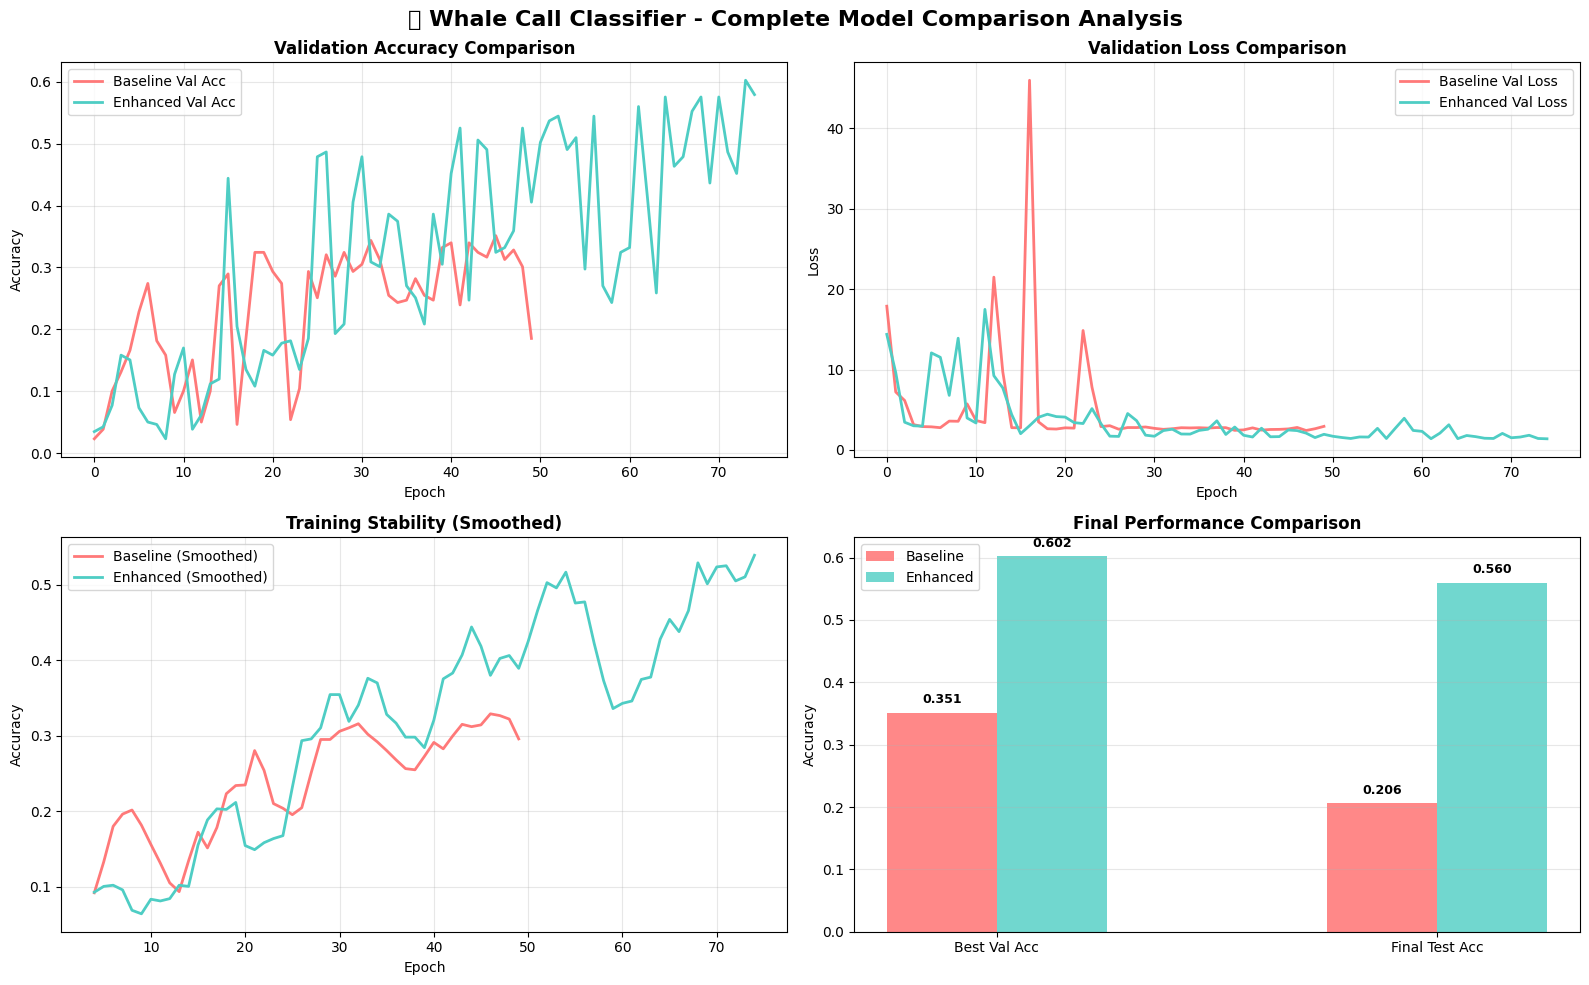


🎯 DETAILED PERFORMANCE ANALYSIS
--------------------------------------------------
🔮 Generating predictions with Custom CNN (Advanced Data Generator)...

📊 Per-Class Performance (sorted by F1-Score):
                         Species  Support  Precision  Recall  F1-Score
              Fin, Finback Whale        6      1.000   1.000     1.000
                       Ross Seal       10      1.000   0.900     0.947
                       Harp Seal        9      0.875   0.778     0.824
           Rough-Toothed Dolphin       10      1.000   0.700     0.824
         Long-Finned Pilot Whale       14      0.846   0.786     0.815
                 Spinner Dolphin       23      0.895   0.739     0.810
                  Humpback Whale       12      0.769   0.833     0.800
        Atlantic Spotted Dolphin       12      0.647   0.917     0.759
              False Killer Whale       10      0.588   1.000     0.741
Short-Finned Pacific Pilot Whale       14      0.688   0.786     0.733
             White

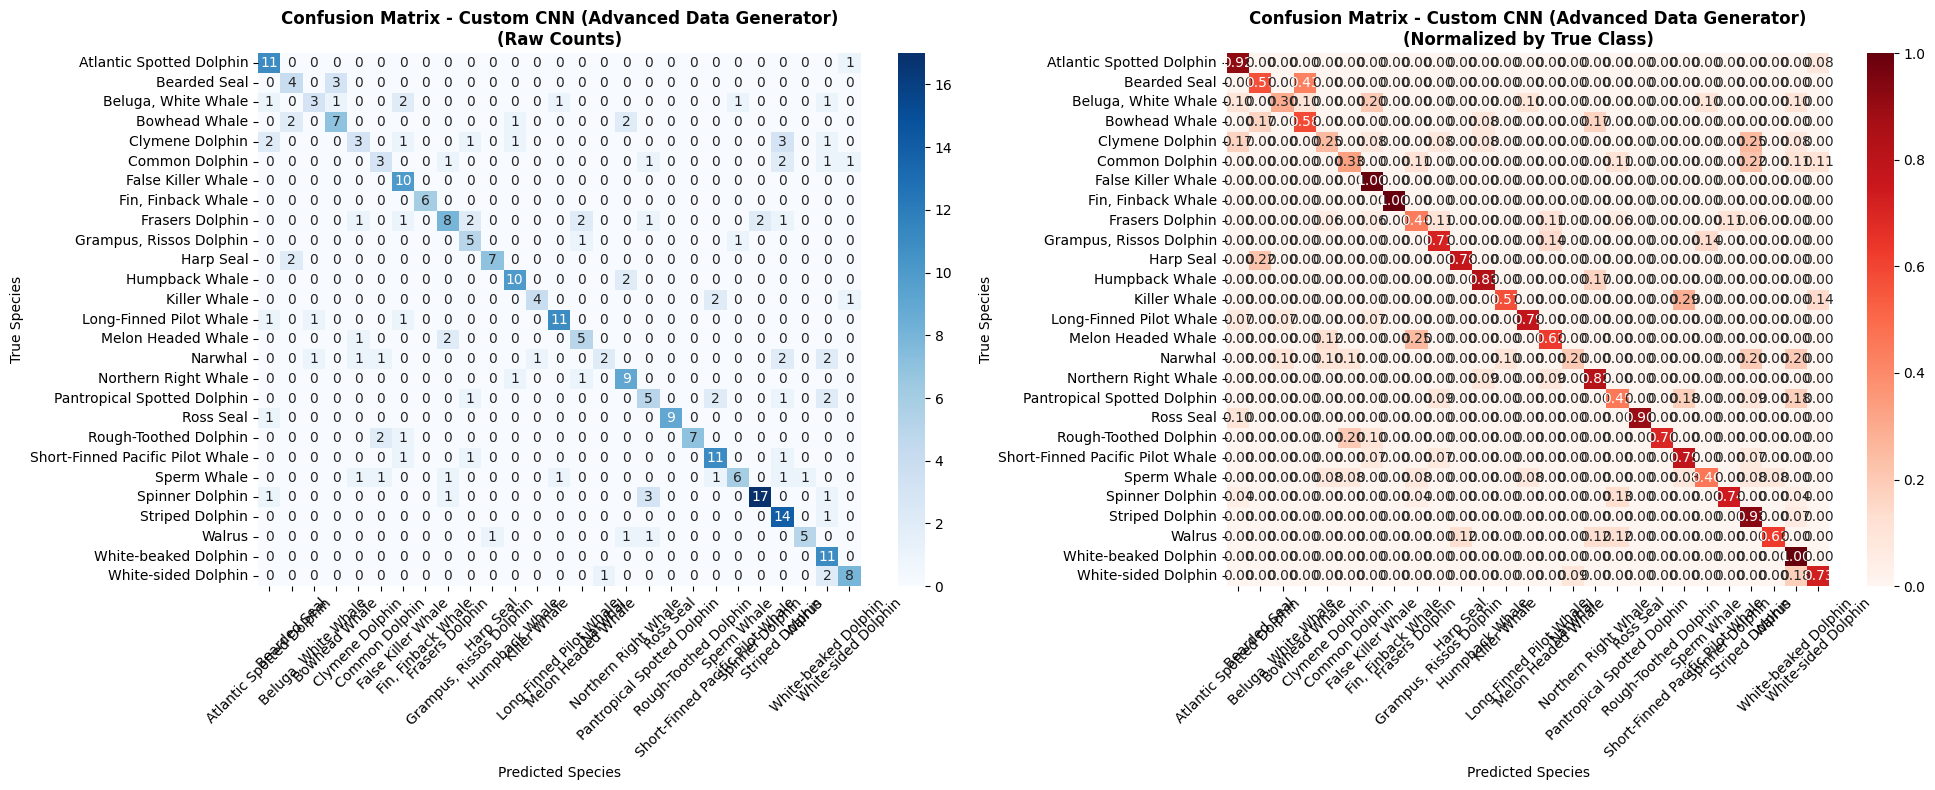


🔍 Most Confused Species Pairs:
----------------------------------------
               True Species                Predicted Species  Count  Rate
               Bearded Seal                    Bowhead Whale      3 0.429
            Spinner Dolphin      Pantropical Spotted Dolphin      3 0.130
            Clymene Dolphin                  Striped Dolphin      3 0.250
        White-sided Dolphin             White-beaked Dolphin      2 0.182
             Common Dolphin                  Striped Dolphin      2 0.222
Pantropical Spotted Dolphin Short-Finned Pacific Pilot Whale      2 0.182
         Melon Headed Whale                  Frasers Dolphin      2 0.250
Pantropical Spotted Dolphin             White-beaked Dolphin      2 0.182
      Rough-Toothed Dolphin                   Common Dolphin      2 0.200
               Killer Whale Short-Finned Pacific Pilot Whale      2 0.286

💾 SAVING EVALUATION RESULTS
--------------------------------------------------
✅ Comprehensive evaluation report

🐋 Whale Call Classifier - Model Evaluation & Results Analysis
✅ Test data loaded: 300 samples, 27 classes
✅ Baseline model history loaded
✅ Enhanced model history loaded


✅ Baseline model loaded


✅ Enhanced model loaded
✅ Custom model loaded


📊 MODEL COMPARISON SUMMARY
--------------------------------------------------
       Model        Architecture Parameters           Data Aug LR Schedule Best Val Acc Test Acc Test Acc %
Baseline CNN 3-layer CNN + Dense        N/A                 No          No        0.351    0.206      20.6%
Enhanced CNN   8-layer CNN + GAP  1,448,443 Yes (ImageDataGen)         Yes        0.602    0.560      56.0%

🚀 PERFORMANCE IMPROVEMENTS:
   Enhanced vs Baseline: +35.4 percentage points (17164.2% relative)

📈 TRAINING CURVES COMPARISON
--------------------------------------------------


/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/1559749482.py:216: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.tight_layout()
/var/folders/x7/81v83xkn2jl3b01w3b61s8tm0000gn/T/ipykernel_16581/1559749482.py:217: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  plt.savefig('../results/complete_model_comparison_analysis.png', dpi=300, bbox_inches='tight')
/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128011 (\N{WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


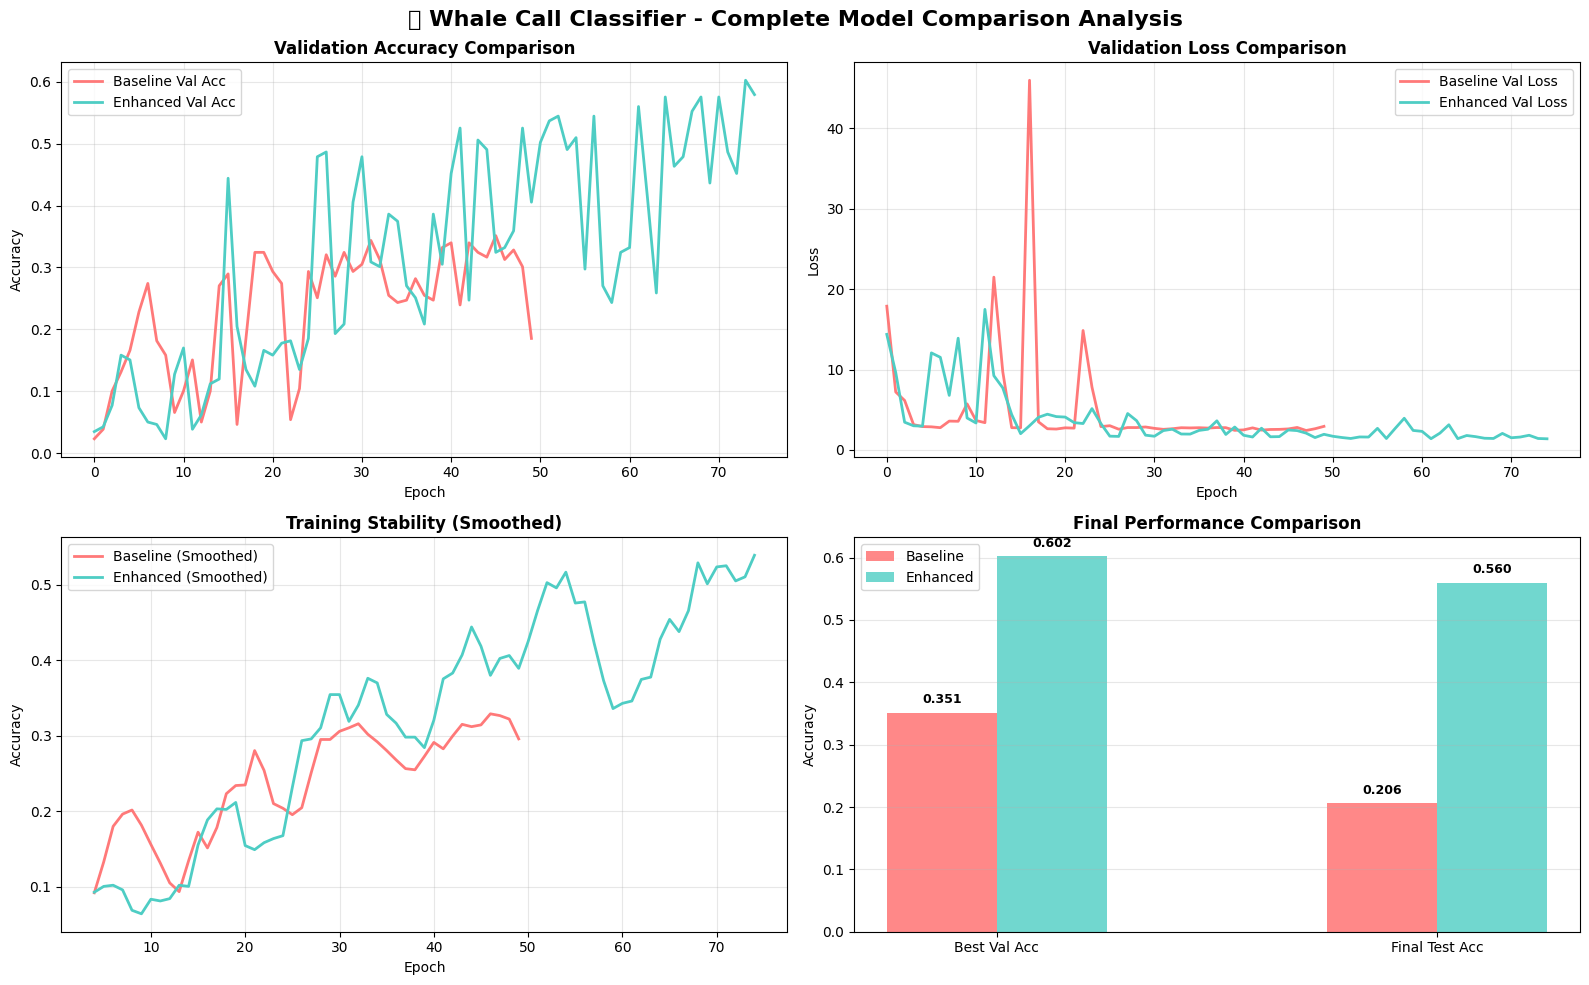


🎯 DETAILED PERFORMANCE ANALYSIS
--------------------------------------------------
🔮 Generating predictions with Enhanced CNN...


/Users/jannik/whale-call-classifier/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



📊 Per-Class Performance (sorted by F1-Score):
                         Species  Support  Precision  Recall  F1-Score
              Fin, Finback Whale        6      1.000   1.000     1.000
                  Humpback Whale       12      0.846   0.917     0.880
                 Spinner Dolphin       23      0.842   0.696     0.762
             White-sided Dolphin       11      0.692   0.818     0.750
        Atlantic Spotted Dolphin       12      0.750   0.750     0.750
                       Ross Seal       10      0.778   0.700     0.737
                   Bowhead Whale       12      0.727   0.667     0.696
                     Sperm Whale       13      0.875   0.538     0.667
              False Killer Whale       10      0.500   0.800     0.615
            White-beaked Dolphin       11      0.423   1.000     0.595
                          Walrus        8      0.556   0.625     0.588
            Northern Right Whale       11      0.450   0.818     0.581
           Rough-Toothed Dolph

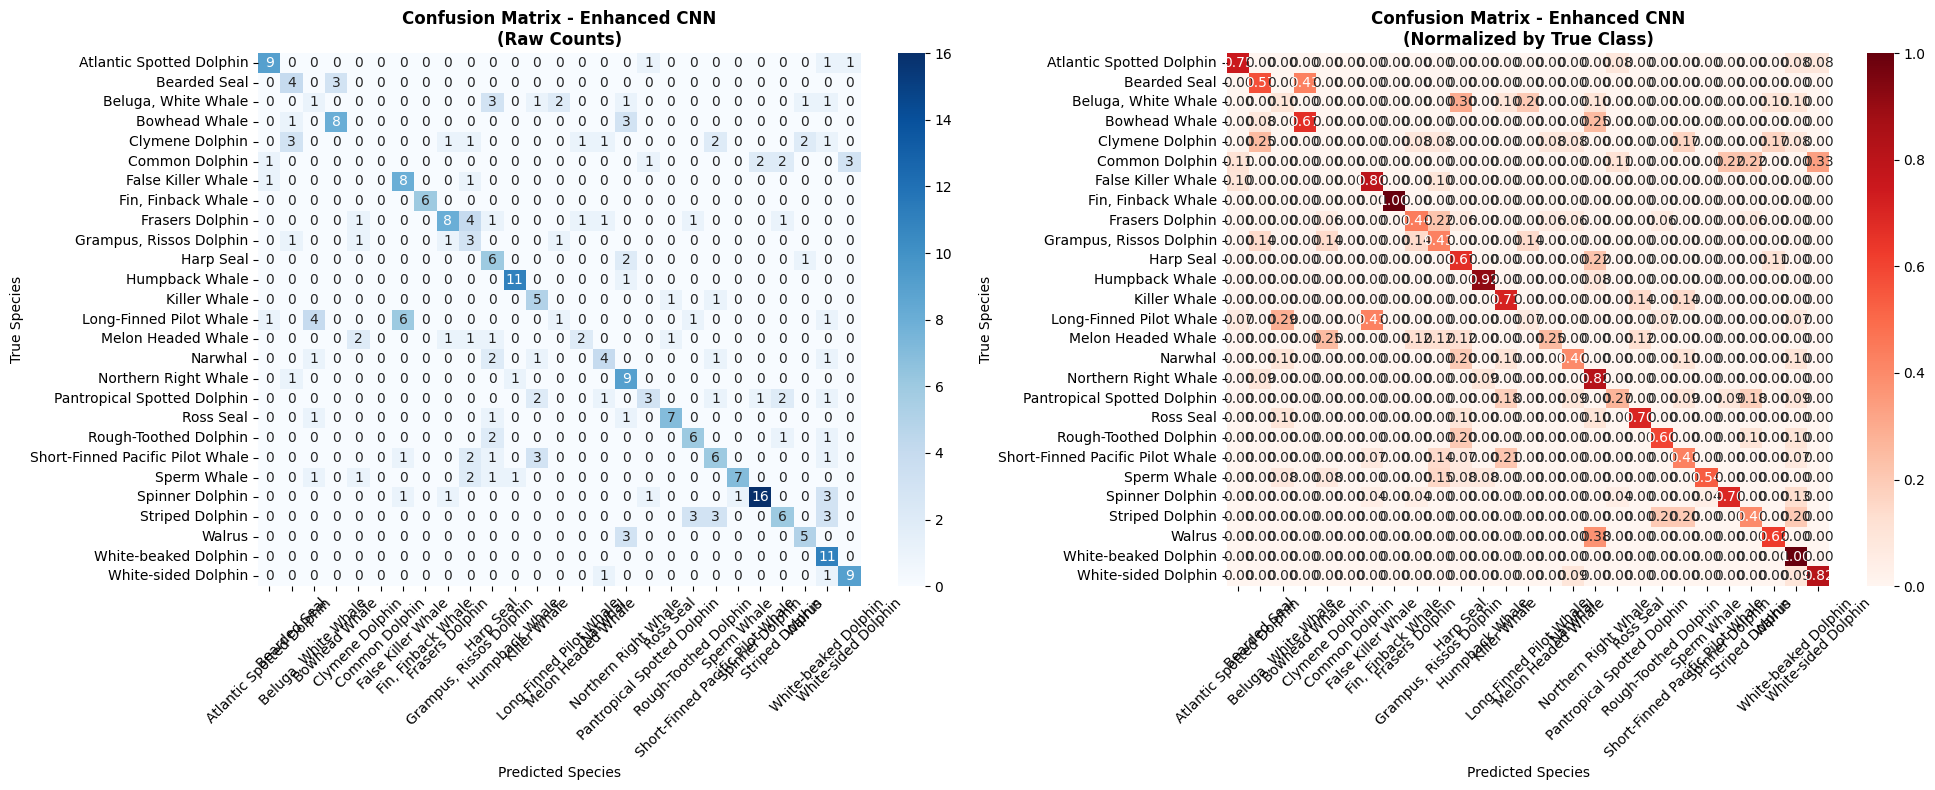


🔍 Most Confused Species Pairs:
----------------------------------------
                    True Species                Predicted Species  Count  Rate
         Long-Finned Pilot Whale               False Killer Whale      6 0.429
                 Frasers Dolphin          Grampus, Rissos Dolphin      4 0.222
         Long-Finned Pilot Whale              Beluga, White Whale      4 0.286
Short-Finned Pacific Pilot Whale                     Killer Whale      3 0.214
                 Spinner Dolphin             White-beaked Dolphin      3 0.130
                  Common Dolphin              White-sided Dolphin      3 0.333
                 Clymene Dolphin                     Bearded Seal      3 0.250
                   Bowhead Whale             Northern Right Whale      3 0.250
                 Striped Dolphin            Rough-Toothed Dolphin      3 0.200
                 Striped Dolphin Short-Finned Pacific Pilot Whale      3 0.200

💾 SAVING EVALUATION RESULTS
-----------------------------

In [6]:
# 🎯 Comprehensive Model Evaluation and Results Analysis
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import os
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pandas as pd

print("🐋 Whale Call Classifier - Model Evaluation & Results Analysis")
print("="*70)

# Load test data and models
try:
    X_test = np.load('../data/processed/X_test.npy')
    y_test = np.load('../data/processed/y_test.npy')
    
    with open('../data/processed/species_mapping.pkl', 'rb') as f:
        species_to_int = pickle.load(f)
    
    # Create reverse mapping
    int_to_species = {v: k for k, v in species_to_int.items()}
    species_names = [int_to_species[i].replace('_', ' ') for i in range(len(species_to_int))]
    
    print(f"✅ Test data loaded: {X_test.shape[0]} samples, {len(species_to_int)} classes")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    raise

# Load training history for comparison
baseline_history = None
enhanced_history = None
custom_history = None

if os.path.exists('../results/training_history.json'):
    with open('../results/training_history.json', 'r') as f:
        baseline_history = json.load(f)
    print("✅ Baseline model history loaded")

if os.path.exists('../results/enhanced_training_history.json'):
    with open('../results/enhanced_training_history.json', 'r') as f:
        enhanced_history = json.load(f)
    print("✅ Enhanced model history loaded")

if os.path.exists('../results/custom_training_history.json'):
    with open('../results/custom_training_history.json', 'r') as f:
        custom_history = json.load(f)
    print("✅ Custom model history loaded")

# Load models
baseline_model = None
enhanced_model = None
custom_model = None

try:
    import tensorflow as tf
    
    if os.path.exists('../models/best_model.keras'):
        baseline_model = tf.keras.models.load_model('../models/best_model.keras')
        print("✅ Baseline model loaded")
    
    if os.path.exists('../models/best_enhanced_model.keras'):
        enhanced_model = tf.keras.models.load_model('../models/best_enhanced_model.keras')
        print("✅ Enhanced model loaded")
        
    if os.path.exists('../models/best_custom_model.keras'):
        custom_model = tf.keras.models.load_model('../models/best_custom_model.keras')
        print("✅ Custom model loaded")
        
except Exception as e:
    print(f"⚠️  Error loading models: {e}")

print("\n" + "="*70)

# 📊 Model Comparison Summary
print("\n📊 MODEL COMPARISON SUMMARY")
print("-"*50)

models_data = []
if baseline_history:
    models_data.append({
        'Model': 'Baseline CNN',
        'Architecture': '3-layer CNN + Dense',
        'Parameters': baseline_history.get('total_parameters', 'N/A'),
        'Data Aug': 'No',
        'LR Schedule': 'No',
        'Best Val Acc': f"{baseline_history['best_val_accuracy']:.3f}",
        'Test Acc': f"{baseline_history['final_test_accuracy']:.3f}",
        'Test Acc %': f"{baseline_history['final_test_accuracy']*100:.1f}%"
    })

if enhanced_history:
    models_data.append({
        'Model': 'Enhanced CNN',
        'Architecture': '8-layer CNN + GAP',
        'Parameters': f"{enhanced_history.get('total_parameters', 'N/A'):,}" if enhanced_history.get('total_parameters') else 'N/A',
        'Data Aug': 'Yes (ImageDataGen)',
        'LR Schedule': 'Yes', 
        'Best Val Acc': f"{enhanced_history['best_val_accuracy']:.3f}",
        'Test Acc': f"{enhanced_history['final_test_accuracy']:.3f}",
        'Test Acc %': f"{enhanced_history['final_test_accuracy']*100:.1f}%"
    })

if custom_history:
    models_data.append({
        'Model': 'Custom CNN',
        'Architecture': '8-layer CNN + GAP',
        'Parameters': f"{custom_history.get('total_parameters', 'N/A'):,}" if custom_history.get('total_parameters') else 'N/A',
        'Data Aug': 'Yes (Custom Gen)',
        'LR Schedule': 'Yes',
        'Best Val Acc': f"{custom_history['best_val_accuracy']:.3f}",
        'Test Acc': f"{custom_history['final_test_accuracy']:.3f}",
        'Test Acc %': f"{custom_history['final_test_accuracy']*100:.1f}%"
    })

if models_data:
    df_comparison = pd.DataFrame(models_data)
    print(df_comparison.to_string(index=False))
    
    # Performance improvement analysis
    if len(models_data) >= 2:
        print(f"\n🚀 PERFORMANCE IMPROVEMENTS:")
        
        if baseline_history:
            baseline_acc = baseline_history['final_test_accuracy']
            
            if enhanced_history:
                enhanced_acc = enhanced_history['final_test_accuracy']
                improvement_enhanced = (enhanced_acc - baseline_acc) * 100
                print(f"   Enhanced vs Baseline: +{improvement_enhanced:.1f} percentage points ({improvement_enhanced/baseline_acc*100:.1f}% relative)")
            
            if custom_history:
                custom_acc = custom_history['final_test_accuracy']
                improvement_custom = (custom_acc - baseline_acc) * 100
                print(f"   Custom vs Baseline:   +{improvement_custom:.1f} percentage points ({improvement_custom/baseline_acc*100:.1f}% relative)")
        
        if enhanced_history and custom_history:
            enhanced_acc = enhanced_history['final_test_accuracy']
            custom_acc = custom_history['final_test_accuracy']
            improvement_custom_enhanced = (custom_acc - enhanced_acc) * 100
            print(f"   Custom vs Enhanced:   +{improvement_custom_enhanced:.1f} percentage points ({improvement_custom_enhanced/enhanced_acc*100:.1f}% relative)")

# 📈 Training Curves Comparison
print(f"\n📈 TRAINING CURVES COMPARISON")
print("-"*50)

available_histories = [h for h in [baseline_history, enhanced_history, custom_history] if h is not None]
history_names = []
if baseline_history: history_names.append('Baseline')
if enhanced_history: history_names.append('Enhanced')
if custom_history: history_names.append('Custom')

if len(available_histories) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    colors = ['#FF6B6B', '#4ECDC4', '#9B59B6']  # Red, Teal, Purple
    
    # Accuracy comparison
    for i, (history, name, color) in enumerate(zip(available_histories, history_names, colors)):
        axes[0,0].plot(history['val_accuracy'], label=f'{name} Val Acc', 
                       color=color, linewidth=2, alpha=0.9 if i == 0 else 1.0)
    axes[0,0].set_title('Validation Accuracy Comparison', fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Loss comparison
    for i, (history, name, color) in enumerate(zip(available_histories, history_names, colors)):
        axes[0,1].plot(history['val_loss'], label=f'{name} Val Loss', 
                       color=color, linewidth=2, alpha=0.9 if i == 0 else 1.0)
    axes[0,1].set_title('Validation Loss Comparison', fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Training stability (smoothed)
    for i, (history, name, color) in enumerate(zip(available_histories, history_names, colors)):
        if len(history['val_accuracy']) >= 5:
            smoothed = np.convolve(history['val_accuracy'], np.ones(5)/5, mode='valid')
            axes[1,0].plot(range(4, len(history['val_accuracy'])), smoothed,
                           color=color, linewidth=2, alpha=0.9 if i == 0 else 1.0, 
                           label=f'{name} (Smoothed)')
    axes[1,0].set_title('Training Stability (Smoothed)', fontweight='bold')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Performance metrics bar chart
    metrics = ['Best Val Acc', 'Final Test Acc']
    x = np.arange(len(metrics))
    width = 0.25
    
    for i, (history, name, color) in enumerate(zip(available_histories, history_names, colors)):
        vals = [history['best_val_accuracy'], history['final_test_accuracy']]
        offset = (i - len(available_histories)/2 + 0.5) * width
        bars = axes[1,1].bar(x + offset, vals, width, label=name, color=color, alpha=0.8)
        
        # Add value labels on bars
        for j, val in enumerate(vals):
            axes[1,1].text(j + offset, val + 0.01, f'{val:.3f}', 
                          ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    axes[1,1].set_title('Final Performance Comparison', fontweight='bold')
    axes[1,1].set_ylabel('Accuracy')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(metrics)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('🐋 Whale Call Classifier - Complete Model Comparison Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('../results/complete_model_comparison_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 🎯 Detailed Performance Analysis (using best model)
print(f"\n🎯 DETAILED PERFORMANCE ANALYSIS")
print("-"*50)

# Determine best model based on test accuracy
best_model = None
model_name = "No Model"
best_test_acc = 0

if custom_model is not None and custom_history:
    if custom_history['final_test_accuracy'] > best_test_acc:
        best_model = custom_model
        model_name = "Custom CNN (Advanced Data Generator)"
        best_test_acc = custom_history['final_test_accuracy']

if enhanced_model is not None and enhanced_history:
    if enhanced_history['final_test_accuracy'] > best_test_acc:
        best_model = enhanced_model
        model_name = "Enhanced CNN"
        best_test_acc = enhanced_history['final_test_accuracy']

if baseline_model is not None and baseline_history:
    if baseline_history['final_test_accuracy'] > best_test_acc:
        best_model = baseline_model
        model_name = "Baseline CNN"
        best_test_acc = baseline_history['final_test_accuracy']

if best_model is not None:
    # Reshape test data for prediction
    X_test_reshaped = np.expand_dims(X_test, axis=-1)
    
    # Get predictions
    print(f"🔮 Generating predictions with {model_name}...")
    y_pred_proba = best_model.predict(X_test_reshaped, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
    
    # Create detailed results DataFrame
    results_df = pd.DataFrame({
        'Species': species_names,
        'Support': support,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    # Sort by F1-score descending
    results_df = results_df.sort_values('F1-Score', ascending=False)
    
    print(f"\n📊 Per-Class Performance (sorted by F1-Score):")
    print("="*80)
    print(results_df.round(3).to_string(index=False))
    
    # Overall metrics
    test_accuracy = np.mean(y_pred == y_test)
    macro_f1 = np.mean(f1)
    weighted_f1 = np.average(f1, weights=support)
    
    print(f"\n📈 Overall Performance Metrics:")
    print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Macro F1-Score: {macro_f1:.4f}")
    print(f"   Weighted F1-Score: {weighted_f1:.4f}")
    
    # Best and worst performing species
    best_species = results_df.iloc[0]['Species']
    worst_species = results_df.iloc[-1]['Species']
    print(f"\n🏆 Best performing: {best_species} (F1: {results_df.iloc[0]['F1-Score']:.3f})")
    print(f"📉 Needs improvement: {worst_species} (F1: {results_df.iloc[-1]['F1-Score']:.3f})")

# 🔥 Confusion Matrix Analysis
print(f"\n🔥 CONFUSION MATRIX ANALYSIS")
print("-"*50)

if best_model is not None:
    cm = confusion_matrix(y_test, y_pred)
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=species_names, yticklabels=species_names, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name}\n(Raw Counts)', fontweight='bold')
    axes[0].set_xlabel('Predicted Species')
    axes[0].set_ylabel('True Species')
    
    # Normalized confusion matrix (by true class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Reds',
                xticklabels=species_names, yticklabels=species_names, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {model_name}\n(Normalized by True Class)', fontweight='bold')
    axes[1].set_xlabel('Predicted Species')
    axes[1].set_ylabel('True Species')
    
    # Rotate x-axis labels
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.savefig('../results/best_model_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analyze most confused species pairs
    print(f"\n🔍 Most Confused Species Pairs:")
    print("-"*40)
    
    # Get off-diagonal elements (misclassifications)
    confusion_pairs = []
    for i in range(len(species_names)):
        for j in range(len(species_names)):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append({
                    'True Species': species_names[i],
                    'Predicted Species': species_names[j],
                    'Count': cm[i, j],
                    'Rate': cm[i, j] / cm[i].sum()
                })
    
    # Sort by confusion count
    confusion_df = pd.DataFrame(confusion_pairs).sort_values('Count', ascending=False)
    print(confusion_df.head(10).round(3).to_string(index=False))

# 💾 Save comprehensive results
print(f"\n💾 SAVING EVALUATION RESULTS")
print("-"*50)

# Create comprehensive evaluation report
evaluation_report = {
    'evaluation_date': pd.Timestamp.now().isoformat(),
    'test_set_size': int(len(y_test)),
    'num_classes': len(species_to_int),
    'species_mapping': species_to_int
}

if best_model is not None:
    evaluation_report.update({
        'best_model_used': model_name,
        'test_accuracy': float(test_accuracy),
        'macro_f1_score': float(macro_f1),
        'weighted_f1_score': float(weighted_f1),
        'per_class_results': results_df.round(4).to_dict('records'),
        'confusion_matrix': cm.tolist()
    })

# Model comparison data
if len(available_histories) >= 2:
    model_comparison = {}
    
    if baseline_history:
        model_comparison['baseline'] = {
            'test_acc': baseline_history['final_test_accuracy'],
            'val_acc': baseline_history['best_val_accuracy'],
            'parameters': baseline_history.get('total_parameters', 'N/A')
        }
    
    if enhanced_history:
        model_comparison['enhanced'] = {
            'test_acc': enhanced_history['final_test_accuracy'],
            'val_acc': enhanced_history['best_val_accuracy'],
            'parameters': enhanced_history.get('total_parameters', 'N/A')
        }
    
    if custom_history:
        model_comparison['custom'] = {
            'test_acc': custom_history['final_test_accuracy'],
            'val_acc': custom_history['best_val_accuracy'],
            'parameters': custom_history.get('total_parameters', 'N/A')
        }
    
    evaluation_report['model_comparison'] = model_comparison

# Save evaluation report
with open('../results/comprehensive_evaluation_report.json', 'w') as f:
    json.dump(evaluation_report, f, indent=2)

print("✅ Comprehensive evaluation report saved: ../results/comprehensive_evaluation_report.json")
print("✅ Complete model comparison saved: ../results/complete_model_comparison_analysis.png")
print("✅ Best model confusion matrix saved: ../results/best_model_confusion_matrix.png")

# 🎯 Final Summary
print(f"\n🎯 EVALUATION SUMMARY")
print("="*50)
print(f"📊 Dataset: {len(y_test)} test samples across {len(species_to_int)} whale species")
print(f"🏆 Models Evaluated: {len(available_histories)}")

for history, name in zip(available_histories, history_names):
    print(f"   {name}: {history['final_test_accuracy']*100:.2f}% test accuracy")

if best_model is not None:
    print(f"\n🏆 Best Model: {model_name}")
    print(f"🎯 Test Accuracy: {test_accuracy*100:.2f}%")
    print(f"📈 Macro F1-Score: {macro_f1:.3f}")

print(f"✅ All evaluation artifacts saved to ../results/")
print(f"\n🐋 Complete whale call classification model evaluation finished!")